## ML Ex1.1 Linear Regression(One Variable)
### Question:
&nbsp;&nbsp;In this part of this exercise, you will implement linear regression
with one variable to predict profits for a food truck. Suppose you are the CEO of
a restaurant franchise and are considering different cities for opening a new outlet.
The chain already has trucks in various cities, and you have data for profits and
populations from the cities. You would like to use this data to help you
select which city to expand to next.The file ex1data1.txt contains the dataset
for our linear regression problem. The first column is the population of a city,
and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

In [17]:
#import libs
import matplotlib.pyplot as plt
import numpy as np

In [43]:
#get data
f=open("ex1data1.txt")
population,profit=[],[]
for line in f:
    line=line.strip('\n')
    data=line.split(',')
    population.append(float(data[0]))
    profit.append(float(data[1]))
dataset=np.zeros([len(population),2])
for i in range(len(population)):
    dataset[i][0]=population[i]
    dataset[i][1]=profit[i]
    print(f'population={dataset[i][0]},profit={dataset[i][1]}')

population=6.1101,profit=17.592
population=5.5277,profit=9.1302
population=8.5186,profit=13.662
population=7.0032,profit=11.854
population=5.8598,profit=6.8233
population=8.3829,profit=11.886
population=7.4764,profit=4.3483
population=8.5781,profit=12.0
population=6.4862,profit=6.5987
population=5.0546,profit=3.8166
population=5.7107,profit=3.2522
population=14.164,profit=15.505
population=5.734,profit=3.1551
population=8.4084,profit=7.2258
population=5.6407,profit=0.71618
population=5.3794,profit=3.5129
population=6.3654,profit=5.3048
population=5.1301,profit=0.56077
population=6.4296,profit=3.6518
population=7.0708,profit=5.3893
population=6.1891,profit=3.1386
population=20.27,profit=21.767
population=5.4901,profit=4.263
population=6.3261,profit=5.1875
population=5.5649,profit=3.0825
population=18.945,profit=22.638
population=12.828,profit=13.501
population=10.957,profit=7.0467
population=13.176,profit=14.692
population=22.203,profit=24.147
population=5.2524,profit=-1.22
population=6

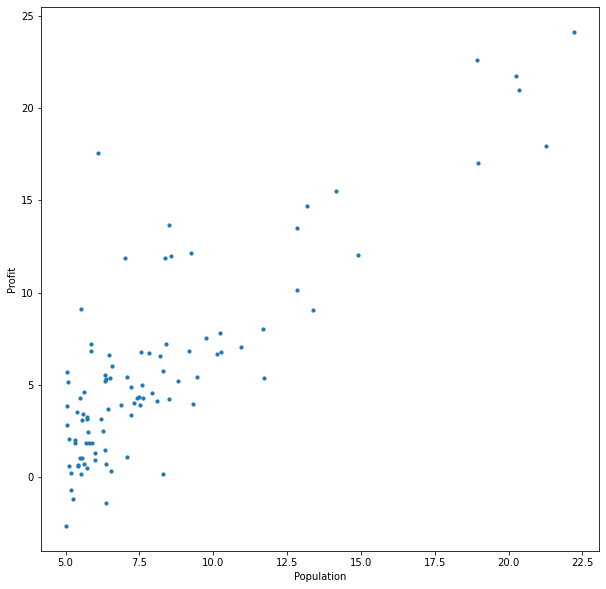

In [44]:
#draw origin data
figure=plt.figure(figsize=[10,10])
plt.xlabel('Population')
plt.ylabel('Profit')
plt.scatter(population,profit,s=10)


# Formulas:
$$hypothesis\ function: \quad h(x)=\theta_0+\theta_1x$$
$$cost\ function: \quad J(\theta_0,\theta_1)=\frac{1}{2m}\sum_{i=1}^m(h(x^{(i)})-y^{(i)})^2$$
$$batch\ gradient\ descent:\quad \theta_j:=\theta_j-\alpha\cdot \frac{\partial J(\theta_0,\theta_1)}{\partial{\theta_j}},j\in\{0,1\} $$
$$Linear\ Regression:\quad \theta_0:=\theta_0-\alpha\cdot \frac{1}{m}\cdot \sum_{i=1}^{m}{(h(x^{(i)})-y^{(i)})},\theta_1:=\theta_1-\alpha\cdot \frac{1}{m}\cdot \sum_{i=1}^{m}{(h(x^{(i)})-y^{(i)})}\cdot x^{(i)}$$

In [45]:
#set original value
theta=np.zeros(2)
alpha=0.01
iteration=1500
m=len(population)

In [46]:
def h(x,_theta):
    return _theta[0]+_theta[1]*x

In [48]:
#compute the cost
costs=np.zeros(iteration+1)
def cost(_theta,_dataset):
    J=0
    for _data in _dataset:
        J+=(h(_data[0],_theta)-_data[1])**2
    J*=1/(2*m)
    return J
costs[0]=(cost(theta,dataset))
print(f'J={costs[0]}')

J=32.072733877455654


In [49]:
#gradient descent
def gradient0(_theta,_dataset):
    res=0
    for _data in _dataset:
        res+=(h(_data[0],_theta)-_data[1])
    return res/m
def gradient1(_theta,_dataset):
    res=0
    for _data in _dataset:
        res+=(h(_data[0],_theta)-_data[1])*_data[0]
    return res/m

def gradient_descent(_theta,times,_dataset,_costs):
    for i in range(times):
        temp0=_theta[0]-alpha*gradient0(_theta,_dataset)
        temp1=_theta[1]-alpha*gradient1(_theta,_dataset)
        _theta[0],_theta[1]=temp0,temp1
        _costs[i+1]=cost(_theta,_dataset)
        print(f'i={i},cost={_costs[i+1]},theta={_theta}')
gradient_descent(theta,iteration,dataset,costs)

i=0,cost=6.737190464870008,theta=[0.05839135 0.6532885 ]
i=1,cost=5.931593568604957,theta=[0.06289175 0.77000978]
i=2,cost=5.901154707081387,theta=[0.05782293 0.79134812]
i=3,cost=5.89522858644422,theta=[0.05106363 0.79572981]
i=4,cost=5.890094943117333,theta=[0.04401438 0.79709618]
i=5,cost=5.885004158443646,theta=[0.03692413 0.79792547]
i=6,cost=5.879932480491416,theta=[0.02983712 0.79865824]
i=7,cost=5.874879094762575,theta=[0.02276118 0.79937279]
i=8,cost=5.8698439118063845,theta=[0.0156977  0.80008305]
i=9,cost=5.86482686531293,theta=[0.0086469 0.8007915]
i=10,cost=5.8598278899321805,theta=[0.00160879 0.80149857]
i=11,cost=5.85484692057229,theta=[-0.00541662  0.80220436]
i=12,cost=5.849883892376585,theta=[-0.01242938  0.80290886]
i=13,cost=5.844938740722035,theta=[-0.01942949  0.8036121 ]
i=14,cost=5.840011401218365,theta=[-0.02641699  0.80431407]
i=15,cost=5.835101809707228,theta=[-0.03339189  0.80501478]
i=16,cost=5.830209902261389,theta=[-0.04035421  0.80571422]
i=17,cost=5.825

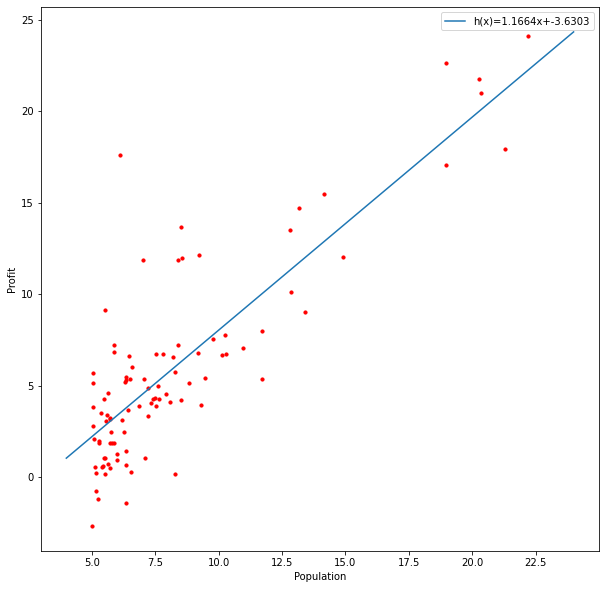

In [50]:
#final graph
figure=plt.figure(figsize=[10,10])
plt.xlabel('Population')
plt.ylabel('Profit')
plt.scatter(population,profit,s=10,c='r')
x=np.arange(4,24,0.01)
y=np.zeros(len(x))
for i in range(len(x)):
    y[i]=h(x[i],theta)
plt.plot(x,y,label=f'h(x)={round(theta[1],4)}x+{round(theta[0],4)}')
plt.legend()
plt.show()

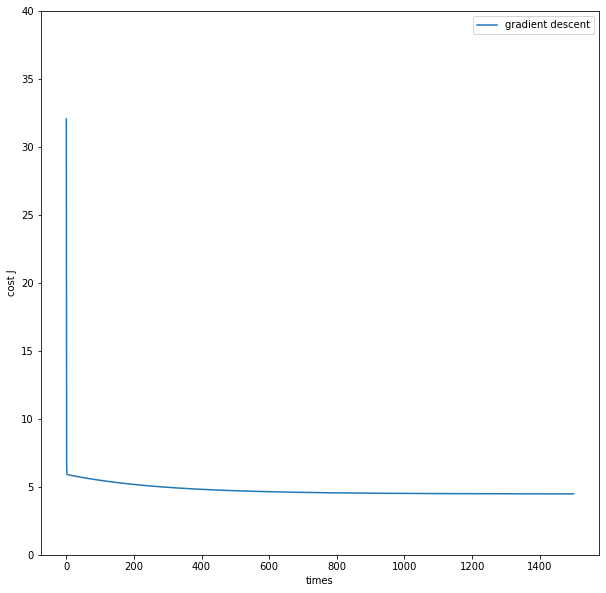

In [51]:
#gradient descent graph
figure=plt.figure(figsize=[10,10])
plt.xlabel("times")
plt.ylabel("cost J")
plt.ylim((0,40))
time=np.arange(0,iteration+1,1)
plt.plot(time,costs,label="gradient descent")
plt.legend()
plt.show()
